# **Asking meaningful questions**

**Student**: Pham Le Tu Nhi  
**Student ID**: 21120308

## Questions preview
There are 2 questions I'm interested in answering with the dataset. 

##### **1. What is the state of Data Science in countries around the world?**
- This is a big question to pose (it's very macro and multi-facet), and at first posing the question I didn't know what I was asking specifically. There are 2 part in the quesions that need specification: `state of DS` and `in the world`. 
    - The first part `state of DS`, after much thinking, I've come to conlcude that I want to know the scale and how Data Science is value in each country, along with what the field Data Science is being apply to most in that country. With this knowledge, we can see **which country is leading in the Data based decision making** and **what field to expect most growth** in corresponding continent. We will also examine the *sex ratio* and *young people ratio* to see what the people will look in the the future of this industry.
    - The second part `in the world` refer to how I would compare countries in the world. The survey is most likely not inclusive of all cases, though I would believe it's a good approximation. Therefore, the `Residential country` is going to be the grouping variable for the analysis. I also went a step further in cataterizing them by their `Continent`, which will hopefully set light on the *distribution of growth between contient*.

    - Notes:
        1. I will also pay more attention to Asian countries (and Vietnam) because that the the area more relevant to our discussion.

        2. I will be analyze countries with all job titles. This might not give the full accurate picture of `Data Science` as a specific job title, but since the survey is a Data Science survey, we can assume that all survey taker has some DS experience - or at least interested in Data Science. Another reason why I'm analyzing all job titles is because I want to include student (who I will assume to be studying Data Science) in my analysis. Of course, for some analysis like ratio of people who work in company with more than 10,000 people, the data of student will not reflects in it as it's will be explicitly about working people. I believe roles of the Data Scientist includes aspects of software engineer, statistics, Ml engineering, project managing... Including those roles are not so far fetch in create a picture about Data Science because they often go hand in hand.

- Specific questions:
    - What is the ratio of people working in company with over 10000 employees?
    - What is the ratio of people working company with less than 50 employees?
    - What is the ratio of people working in companies with more than 20 Data Scientist?
    - What is the ratio of people working in companies with less than 5 Data Scientist?
    - What is the ratio of people who have at least 5 years of programming experience?
    - What is the ratio of people who have at least 5 years of ML experience?
    - What is the ratio of people who make more than 10000 dollar a year?
    - What is the ratio of people who work in the field of finance?
    - What is the ratio of people who work in the field of technology?
    - What is the ratio of people who work in the field of biotech/medicine?
    - What is the ratio of people who work in the field of education?
    - What is the ratio of people who earn more than 10,000 dollars a year?
    - What is the ratio of young (20 - 30 years old) people working in the field?
    - What is the ratio of older (40 - 60 years old) people working in the field?
    - What is the ratio of male people participated in the survey?
    - What is the ratio of people who have a Master or higher education degree?
    - What is the insights we learned from the ratios to answer the questions about **which country is leading in the Data based decision making**, **how are they doing that** and **what field to expect most growth** of countries and continents in the world?

(*) This framework is morrored after the analysis of Kaggle ML & DS survey 2022 analysis competion. Detailed in `What I learned` session.

##### **2. What to do to get a Data Scientist position?**
- This is a rather straight-forward question to pose. With our dataset, I would like to see what the Data Scientist who took the survey study and what technical skills they have to hone to get the job.

- Specific questions:
    - In the Data Scientist who took the survey, what percentage of them have no degree? What percentage of them have a degree (BS, MS, Ph.D)? 
    - In the people who don't have a degree, do they take online courses? What platform do they use?
    - In the people who have a degree, do they take online courses? What platform do they do?
    - In the peopel who have a degree, what percentage of them take online courses?
    - What are the distribution of programming experience level in Data Scientists who took the survey?
    - What are the distribution of ML experience level in Data Scientists who took the survey?
    - What other conclusion (inference) I could make from the answers of the 3 questions above?

##### Programming & dataset preparation

Let's load up our data for analysis.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# !pip install geoplot
import geoplot as gplt
import geoplot.crs as gcrs


#!pip install pycountry_convert
# For getting continent name
import pycountry_convert as pc

# !pip install functools
# For merging multiple df
from functools import reduce

In [2]:
data = pd.read_csv('../Dataset/kaggle_survey_2022_responses_rename.csv', index_col=0, dtype=object)

We also have to do some data correction with name of some countries.

In [3]:
# Rename of countries name
data['Residential country'] = data['Residential country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom').replace("People 's Republic of China", 'China').replace('Iran, Islamic Republic of...', 'Iran').replace('Hong Kong (S.A.R.)', 'Hong Kong')

# Drop invalid values
invalid_country_value = ((data['Residential country'] == 'I do not wish to disclose my location') | (data['Residential country'] == 'Other'))
data.drop(data[invalid_country_value].index, inplace=True)

# Transform salary data
over_10k = ["10,000-99,999", "15,000-19,999", "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999",
                      "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", "100,000-124,999",
                      "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-499,999",
                      "$500,000-999,999", " >$1,000,000"]
data['Current income'] = data['Current income'].apply(lambda x: '> 10,000' if x in over_10k else x)

## What is the state of Data Science around the world?

First, let's check the distribution of survey respondent by country.

In [4]:
total_response_df = data.groupby('Residential country')['Residential country'].agg(number_of_response = 'count').query('number_of_response > 100')
total_response_df = total_response_df.reset_index()

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

continent_color = {
    'North America' : 'brown',
    'South America': 'red', 
    'Asia': 'green',
    'Australia': 'purple',
    'Africa': 'yellow',
    'Europe': 'pink'
}

total_response_df['Continent'] = total_response_df['Residential country'].apply(lambda x: continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(x, cn_name_format='default'))])

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Number of survey taker by country')

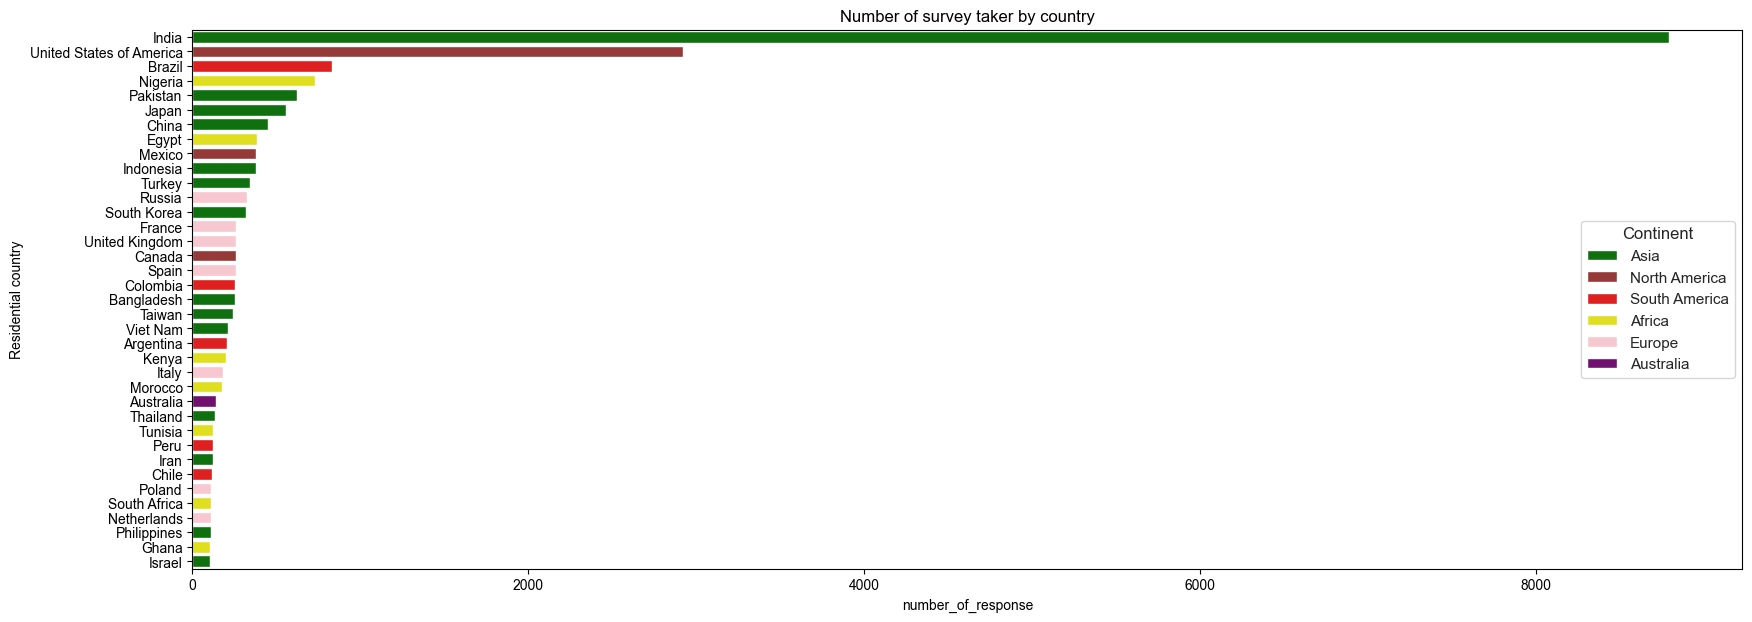

In [5]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(x='number_of_response', y='Residential country', data=total_response_df.sort_values(by='number_of_response', ascending=False), palette=continent_color ,hue='Continent', dodge=False)
ax.set_title("Number of survey taker by country")

Looking at the graph, we can see that response from Inida is overwhelmingly large (more than twice as much as the US). Aside from India and the US, other countries seems to be distributed quite uniformly, mixing countries from all Continent. 

Looking closer, we can see that there are only 3 countries from North America, and they are all distributed on the first half of the graph. Another interesting distirbution is with European countries - they are distirbution from the lower first half all the way to the bottom. Asian and African countries seems to be distributed quite even across the graph. And after looking at the graph for sometimes you could notice there is only 1 country from the Australia continent that makes the list is Australia.

Just for better illustration let's see how the Number of survey taker is distributed by number of `Country` in a `Continent`. 

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Number of country in each continent with more than 100 survey response')

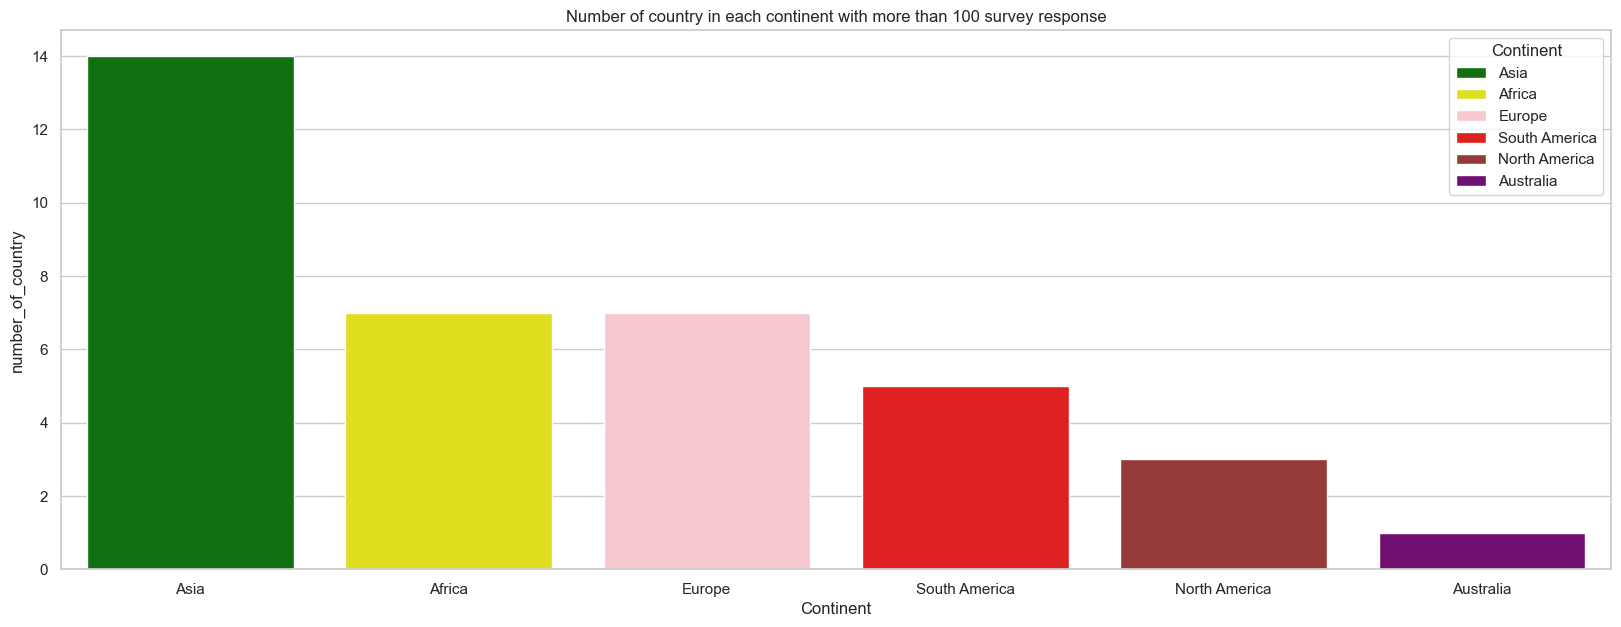

In [6]:
response_by_country_continent = total_response_df.groupby('Continent')['Residential country'].agg(number_of_country='count')
response_by_country_continent = response_by_country_continent.reset_index()

figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')
sns.barplot(y='number_of_country', x='Continent', data=response_by_country_continent.sort_values(by='number_of_country', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Number of country in each continent with more than 100 survey response")

Notice that most of the survey taker are from Asia, follow by Africa countries. Perhaps this can be explain simply by the correlation to number of countries that is in each continent (Asia is the biggest continent). Still, we can still see that Asian countries are more and more engage in Data Science activities - as Asia become more and more wealthy and well educated. The same can be said about African countries. 

### Ratio of people working in company with more than 10,000 employees

In [7]:
# Calculate the ratio of people who work in company with more than 10,000 employees
big_company_df = data[(data['Company size'] == '1000-9,999 employees') | (data['Company size'] == '10,000 or more employees')]
big_company_df = pd.merge(big_company_df.groupby('Residential country')['Company size'].agg(big_company = 'count'), total_response_df, on='Residential country')
big_company_df['big_com_ratio'] = big_company_df['big_company'] * 100 / big_company_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in company with more than 1,000 employees')

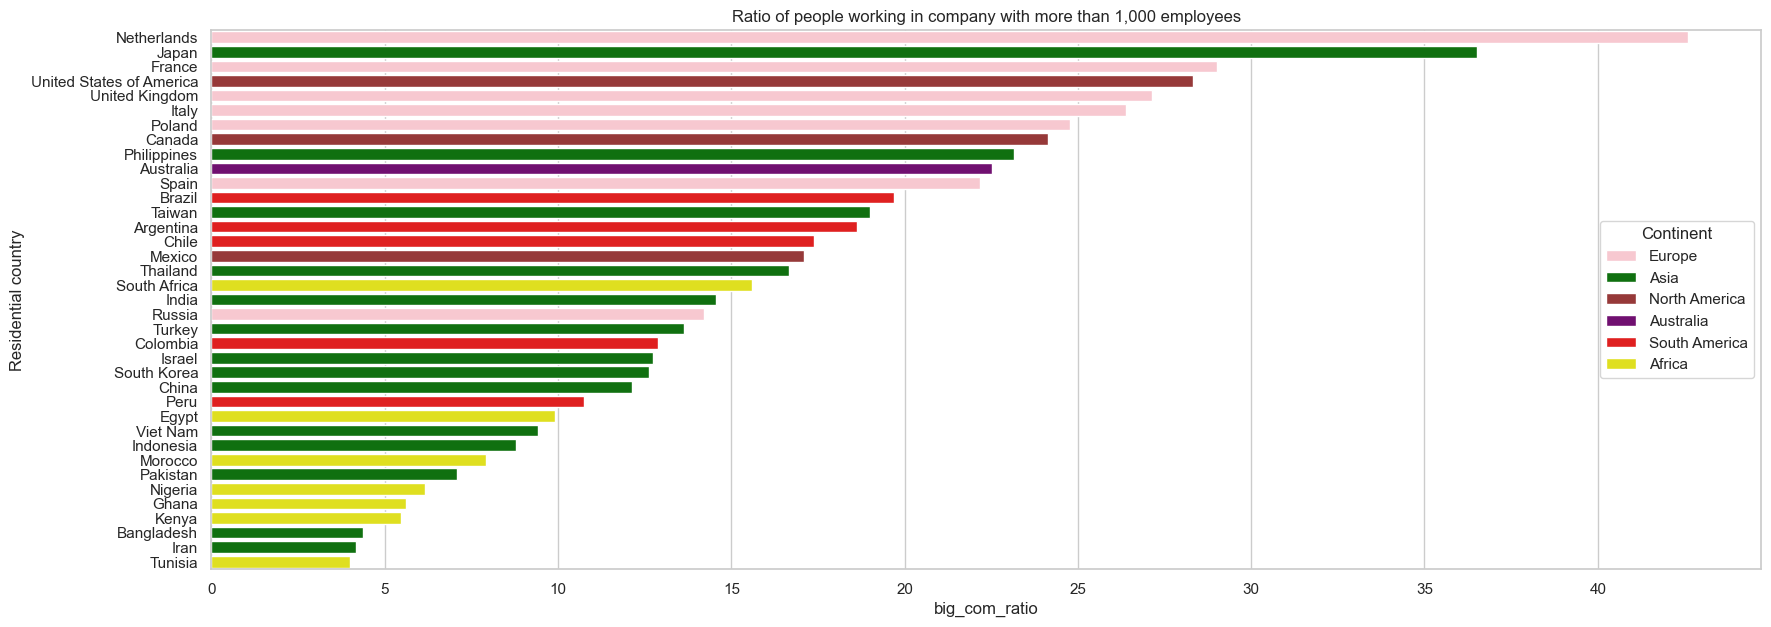

In [8]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='big_com_ratio', y='Residential country', data=big_company_df.sort_values(by='big_com_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in company with more than 1,000 employees")

The first ratio describe the information about the scale of the company that the survey taker is employed in. We are looking at companies that are big in scale, nationally or mutinationally. Looking at the graph, we can see the top of the graph is mostly populated by European, North America countries and Australia  - with the country on top is the Netherlands (at ~24% - almost a 7% difference from 2nd place country of Japan). Asian countries span from top to bottom of the graph, concentrated at the third quatile. African countries concentrated on the bottom of the graph, while South Americas countries span from middle to bottom of the graph.

Notice that in Asian countries, Japan is significantly larger in scale than others, follow than India and the Phillippines. Vietnam is almost bottom of the chart (3rd from bottom to top in Asia country at ~2.5%).

### Ratio of people working in company with less than 50 employees

In [9]:
small_company_df = data[(data['Company size'] == '0-49 employees')]
small_company_df = pd.merge(small_company_df.groupby('Residential country')['Company size'].agg(small_company = 'count'), total_response_df, on='Residential country')
small_company_df['small_com_ratio'] = small_company_df['small_company'] * 100 / small_company_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in company with less than 50 employees')

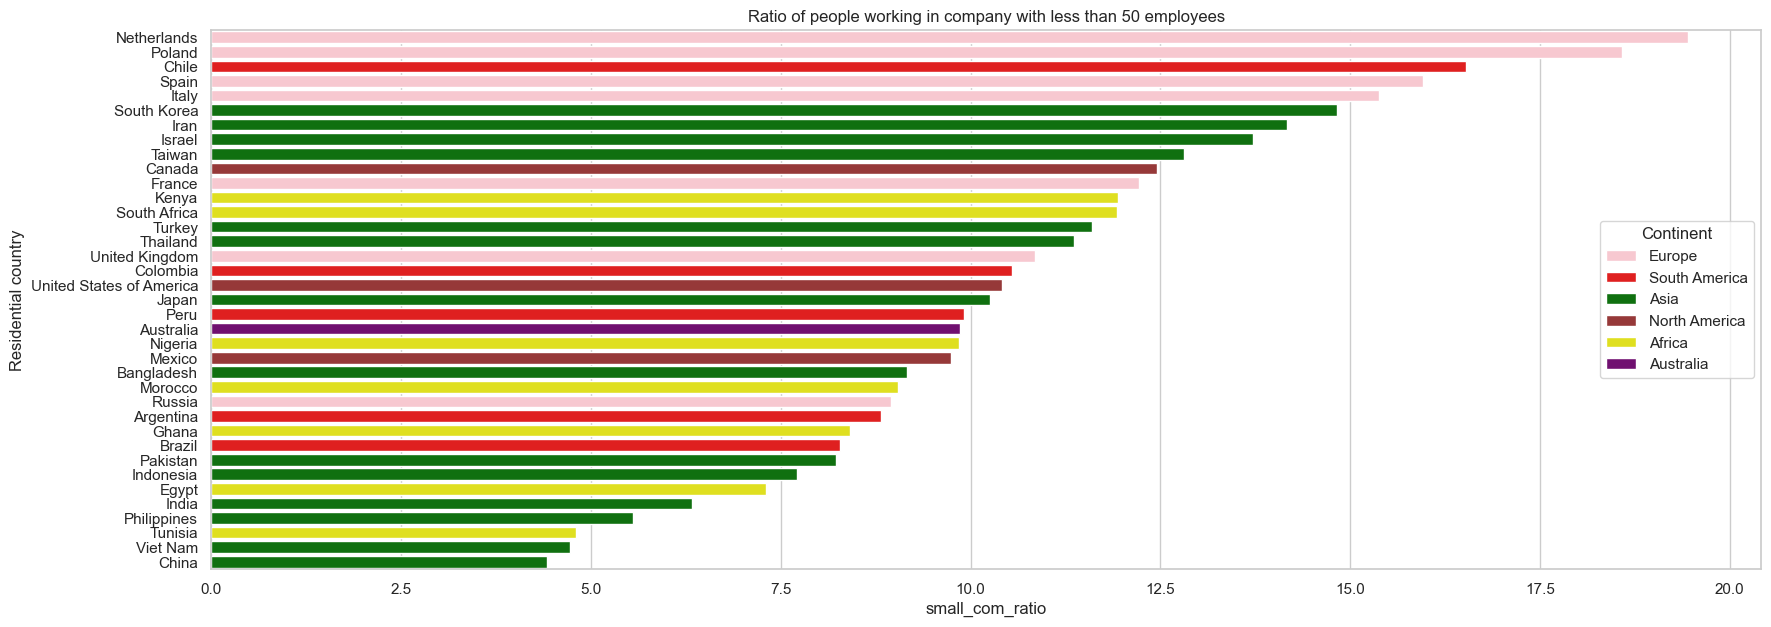

In [10]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='small_com_ratio', y='Residential country', data=small_company_df.sort_values(by='small_com_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in company with less than 50 employees")

The second ratio describe the information of the scale of the company that the survey taker is employed in, but this time in the smallest scale (less than 50 employees). We are looking at small, probally national level companies or start ups. As we can see, once again most of the countries on the top are European countries, with the Netherlands being at the top again. Notice that Russia is at the around the third quartile, which is quite low. 

African countries distributed from mid to bottom of the graph. Austraia, North and South American countries populate the graph from the middle top to the middle of the graph.

For Asian countriest, the distribution is more spaced out, with more welthy counties populate the bottom top rank (after European countries), peper from middle to bottom of the graph, closing with Vietnam and China at the very bottom (~ 5%).



### Ratio of people working in companies with more than 20 Data Scientist

In [11]:
company_w20ds_df = data[(data['Individual responsible'] == '20+')]
company_w20ds_df = pd.merge(company_w20ds_df.groupby('Residential country')['Company size'].agg(ds20_count = 'count'), total_response_df, on='Residential country')
company_w20ds_df['com_w20ds_ratio'] = company_w20ds_df['ds20_count'] * 100 / company_w20ds_df['number_of_response']


c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in companies with more than 20 Data Scientist')

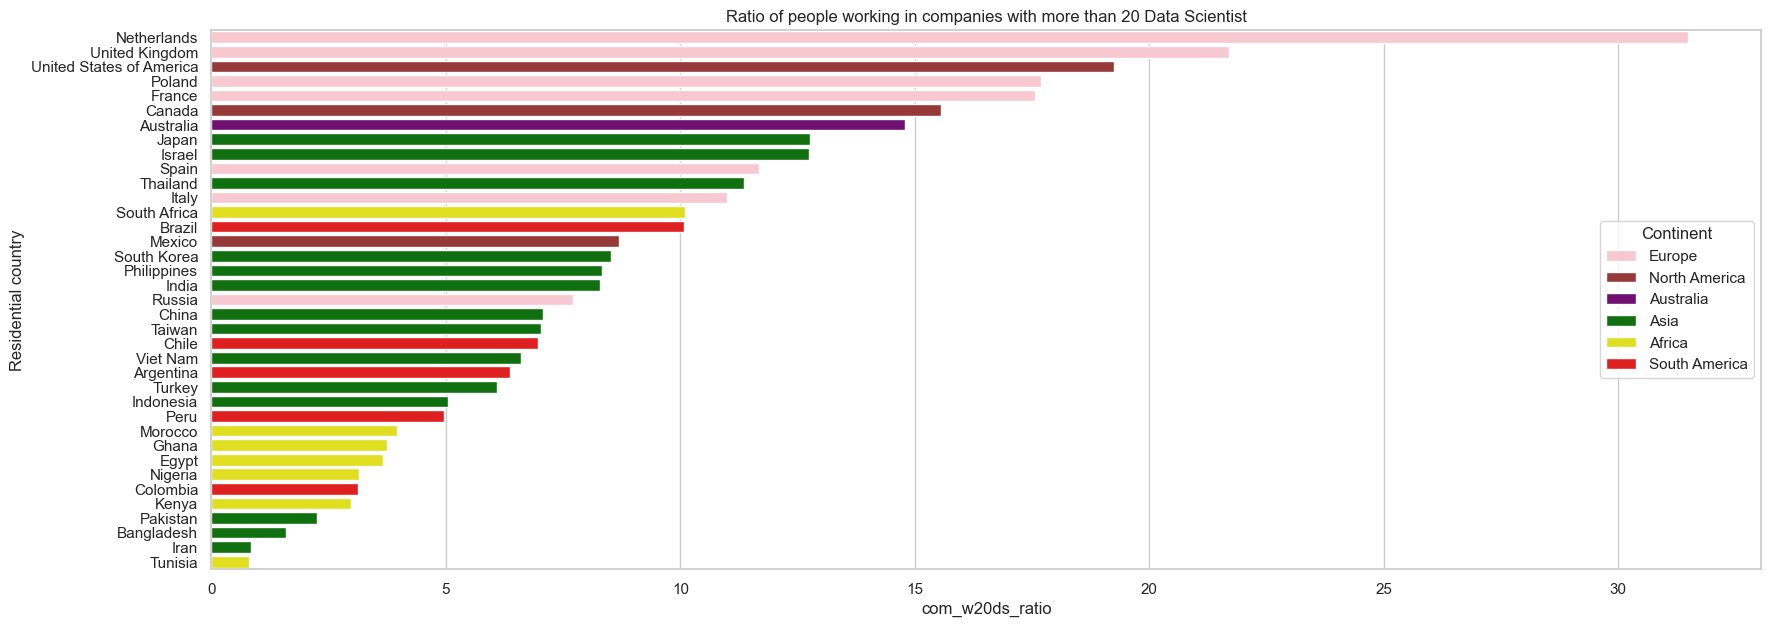

In [12]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='com_w20ds_ratio', y='Residential country', data=company_w20ds_df.sort_values(by='com_w20ds_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in companies with more than 20 Data Scientist")

The third ratio describe the information of the scale of the DS team in the company that the survey taker is employed in. We are looking at companies that have its dedicated team of DS, or is focused in providing DS services. As we can see, once again most of the countries on the top are European countries, with the Netherlands being at the top again for the third time. Notice that Russia is at the bottom of the European country again.

We can see that the North American countries (the US and Canada) also score quite high in the list, same goes with Austria. The African countries score very low (at the bottom of the list) with the exception of South Africa at about 10%.

For Asian countries, we see that Japan and Israel are most equiped with companies with a large DS team. Other than that, the other contries score qutie low, spanning from the middle to the end of the graph. Vietnam scored about 6%, which put us at the about the third quartile of the graph.

### Ratio of people working in companies with less than 5 Data Scientist

In [13]:
company_l5ds_df = data[(data['Individual responsible'] == '1-2') | (data['Individual responsible'] == '3-4')]
company_l5ds_df = pd.merge(company_l5ds_df.groupby('Residential country')['Company size'].agg(ds5_count = 'count'), total_response_df, on='Residential country')
company_l5ds_df['com_l5ds_ratio'] = company_l5ds_df['ds5_count'] * 100 / company_l5ds_df['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people working in companies that has Data Scientist with less than 5 Data Scientist')

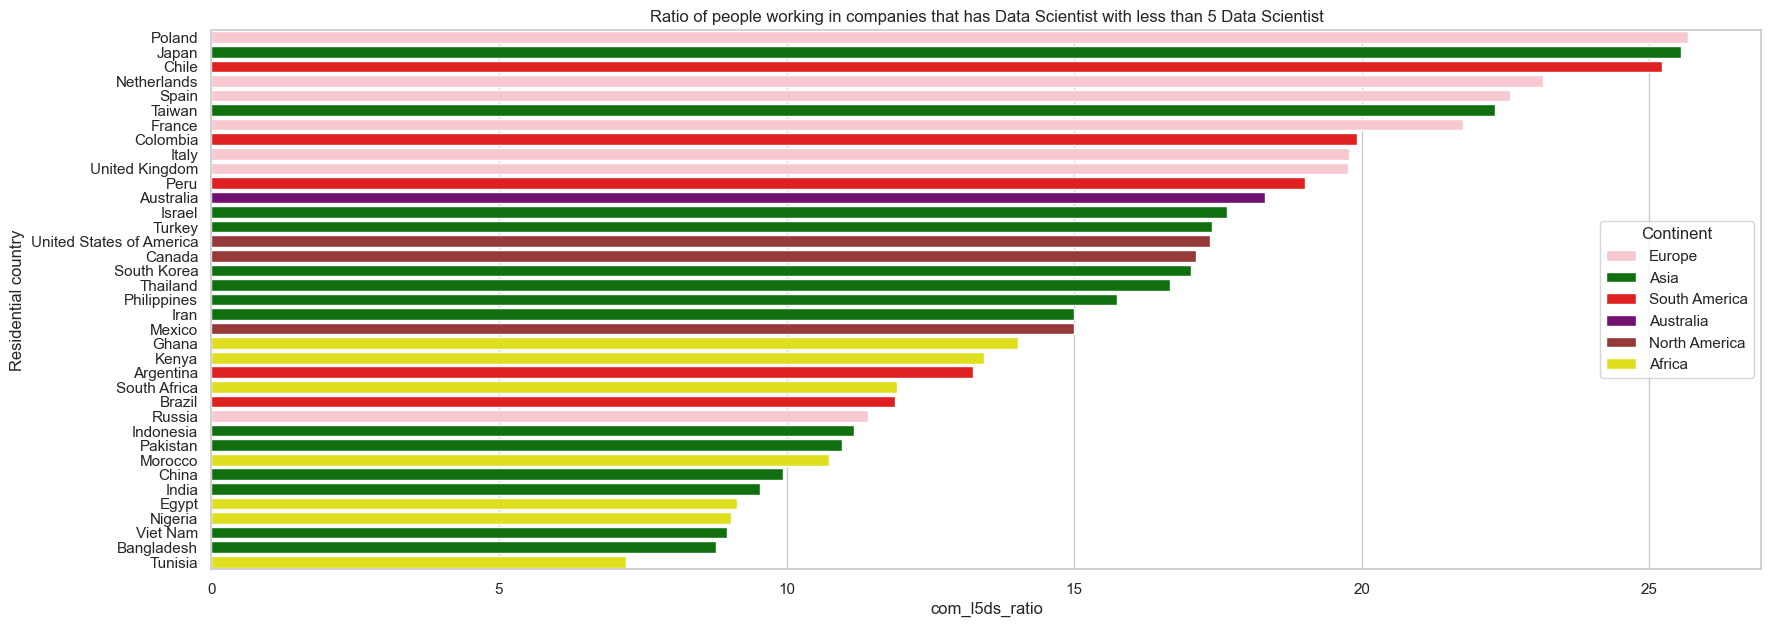

In [14]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='com_l5ds_ratio', y='Residential country', data=company_l5ds_df.sort_values(by='com_l5ds_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people working in companies that has Data Scientist with less than 5 Data Scientist")

The fourth ratio describe the information of the scale of the DS team in the company that the survey taker is employed in (in the smallest scale <= 5 DS). We are looking at smaller organizations with small DS team, which not necessarily translate to small companies and start up, but companies who are aware of using data for decision making (because they have more than 1 DS) but have a small team for the job. As we can see, once again most of the countries on the top are European countries, but the top country is replaced with Poland. The graph is more clearly defined. The major color of European, Asian and African countries devide the graph into 3 distinct part. The top is populated with majority European countries, while the middle with with Asian countries and the bottom is of African countries peper with some Asian countries. 

While the North American contries and Australia is located at around the middle of the graph (~17%), the South American countries is divided into 2 group one on the first half of the graph (~20%) and one at the bottom of the graph (~12%).

Vietnam is ranked at the bottom of the graph (3rd from bottom up at ~8%).

### Ratio of people who have at least 5 years of programming experience

In [15]:
ppl_w5y_programming_exp = data[(data['Programming experience'] == '5-10 years') | (data['Programming experience'] == '20+ years') | (data['Programming experience'] == '10-20 years')]
ppl_w5y_programming_exp = pd.merge(ppl_w5y_programming_exp.groupby('Residential country')['Company size'].agg(programing_exp = 'count'), total_response_df, on='Residential country')
ppl_w5y_programming_exp['programming_exp_ratio'] = ppl_w5y_programming_exp['programing_exp'] * 100 / ppl_w5y_programming_exp['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who have at least 5 years of programming experience')

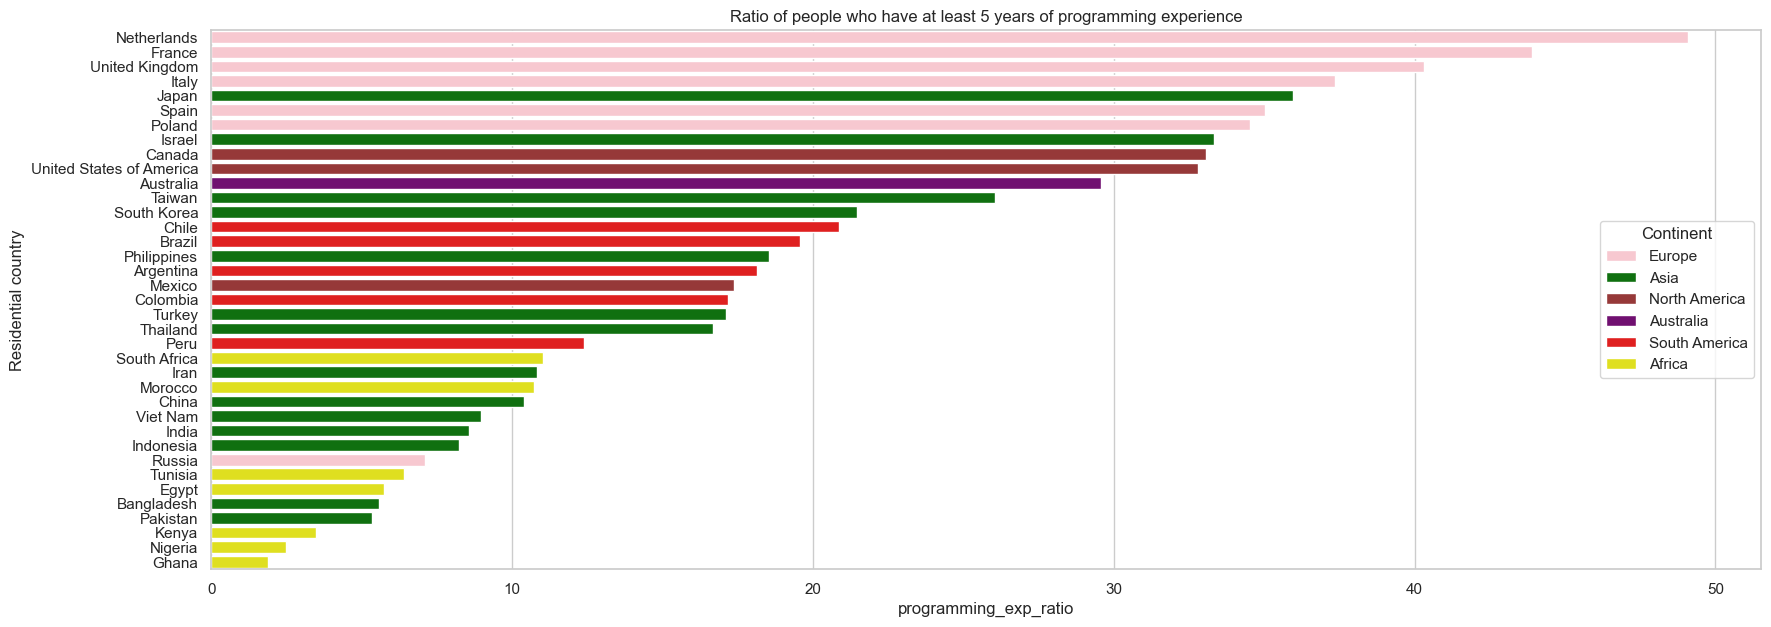

In [16]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='programming_exp_ratio', y='Residential country', data=ppl_w5y_programming_exp.sort_values(by='programming_exp_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who have at least 5 years of programming experience")

The fifth ratio describe the talents of each countries with programming experience (exceed 5 years mark). Again, the European countries dominated the top of the graph, with the Netherlands at the top again at ~50% of survey taker are have at least 5 years of programming experience. The North America and Australia follow suits European countries at about 33%. 

South American countries populate the middle of the graph, and African countries sitting at the bottom of the graph (some countries don't get to the 10% mark).

Asian countries are most ranged, with Japan having the higest ratio at ~35%, to the Pakistan at the bottom of ~5%. Vietnam sits just behind China (~10%) at about 9%.  

### Ratio of people who have at least 5 years of ML experience

In [17]:
ppl_w5y_ml_exp = data[(data['ML experience'] == '5-10 years') | (data['ML experience'] == '20 or more years') | (data['ML experience'] == '10-20 years')]
ppl_w5y_ml_exp = pd.merge(ppl_w5y_ml_exp.groupby('Residential country')['Company size'].agg(ml_exp = 'count'), total_response_df, on='Residential country')
ppl_w5y_ml_exp['ml_exp_ratio'] = ppl_w5y_ml_exp['ml_exp'] * 100 / ppl_w5y_ml_exp['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who have at least 5 years of ML experience')

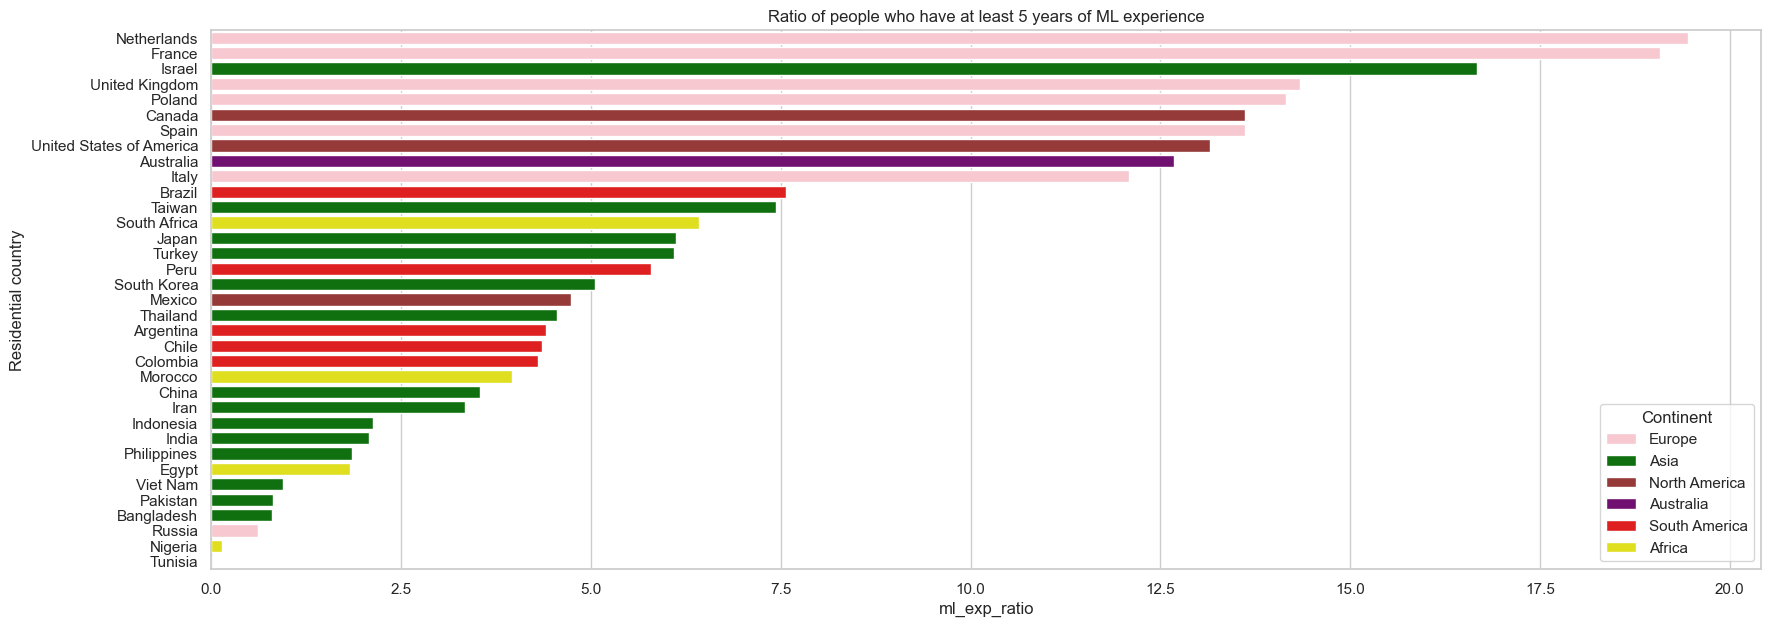

In [18]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ml_exp_ratio', y='Residential country', data=ppl_w5y_ml_exp.sort_values(by='ml_exp_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who have at least 5 years of ML experience")

The sixth ratio describe the talents of each countries with ML experience (exceed 5 years mark). One thing we notice about this graph compare to the previous graph is that it range is significantly shorter (at maximum of ~20% compare to ~50%). The European countries dominate the top, with the Netherlands at the top at ~19%. Follow suits are the North Aemrican countries at ~13%. Most of countries from Afria, Asia and South America are concentrated at the middle - bottom of the graph (range 5(+-2) %).

Surprisingly, Israel is the Asian country with the highest score at ~16%, and not Japan (~6%). 

Vietnam is ranked at the very bottom group with ~1% survey taker has more than 5 years in ML experience. Surprisingly, Russia is ranked lower, with less than 1%.

### Ratio of people who work in the field of finance

In [19]:
ppl_in_finance_industry = data[(data['Current industry'] == 'Accounting/Finance')]
ppl_in_finance_industry = pd.merge(ppl_in_finance_industry.groupby('Residential country')['Company size'].agg(fin_count = 'count'), total_response_df, on='Residential country')
ppl_in_finance_industry['finance_ratio']= ppl_in_finance_industry['fin_count'] * 100 / ppl_in_finance_industry['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who work in the field of finance')

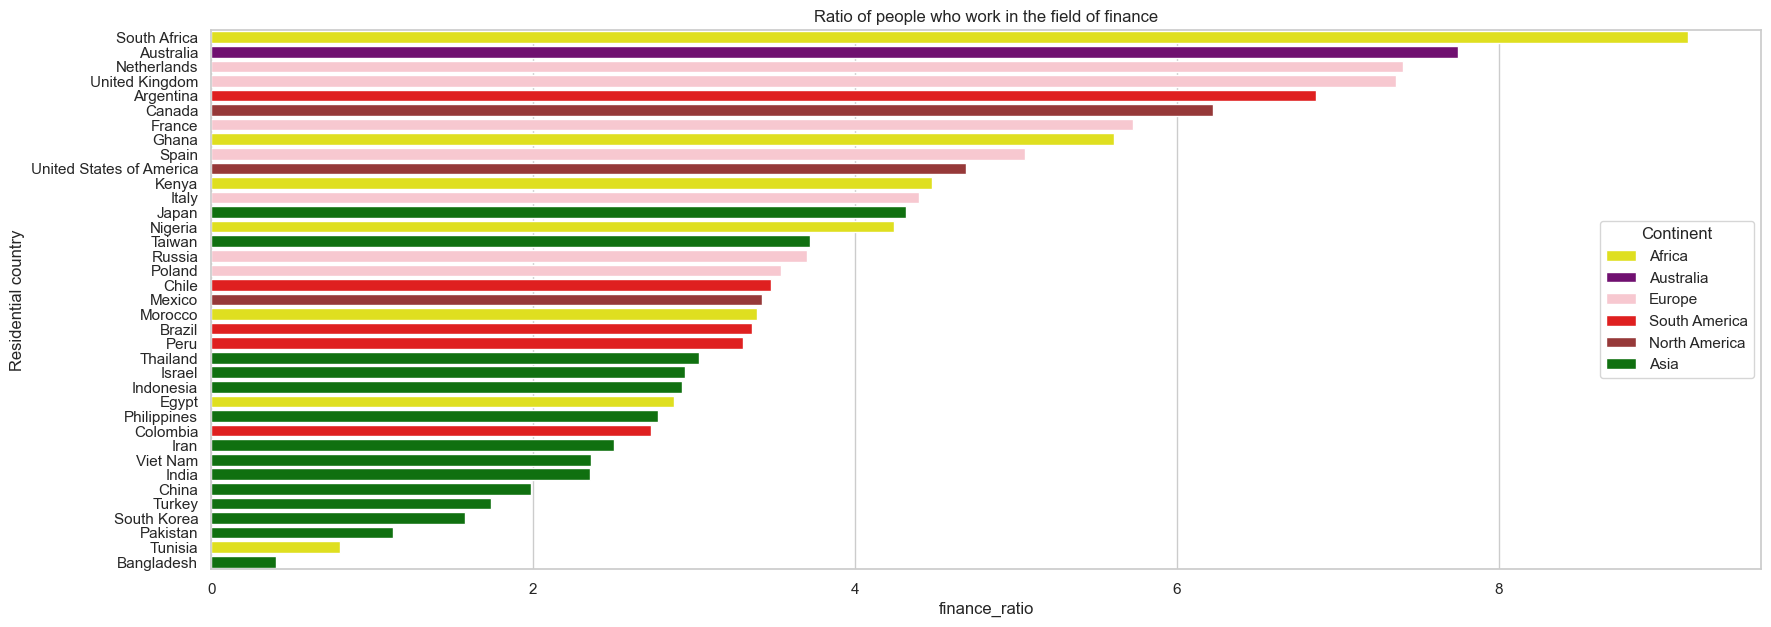

In [20]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='finance_ratio', y='Residential country', data=ppl_in_finance_industry.sort_values(by='finance_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who work in the field of finance")

The seventh ratio describe the infomation of scale of popularity of the field of finance in using DS of each countries. At first glance, it's quite surprising to see an African country at the top of the graph - South Africa at ~9%. All European countries are in the first half of the graph (~4 (+-2)%).

North America countries and Austrilia is at the top of the graph at well (except for Mexico). African countries and distributed quite evenly from high to low. South America countries are distributed at around the middle of the graph (~ 4 (+-1) %).

Asian countries are concentrated at the bottom of the graph. Vietnam, being one of the bottom, is at ~2%.

### Ratio of people who work in the field of technology

In [21]:
ppl_in_tech_industry = data[(data['Current industry'] == 'Computers/Technology')]
ppl_in_tech_industry = pd.merge(ppl_in_tech_industry.groupby('Residential country')['Company size'].agg(tech_count = 'count'), total_response_df, on='Residential country')
ppl_in_tech_industry['tech_ratio'] = ppl_in_tech_industry['tech_count'] * 100 / ppl_in_tech_industry['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who work in the field of technology')

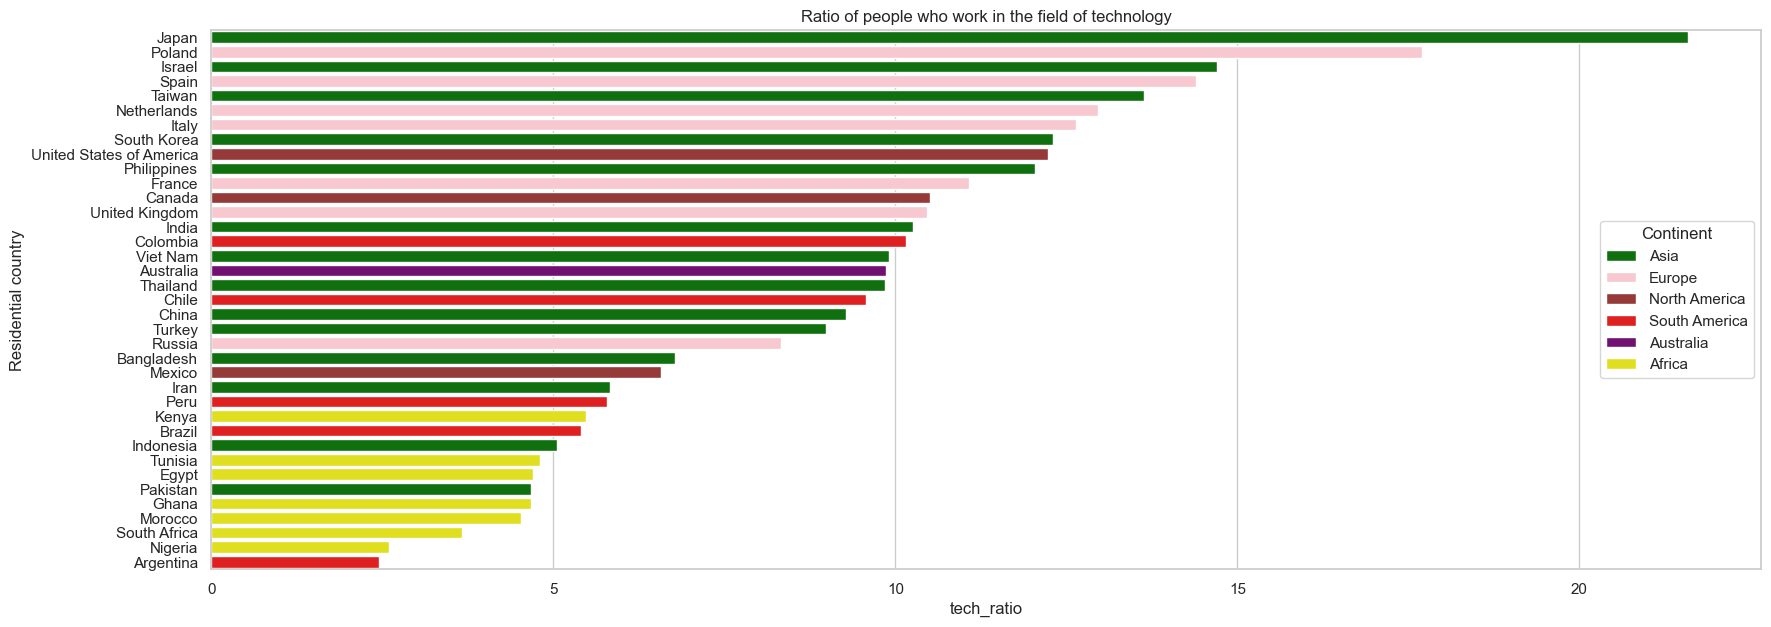

In [22]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='tech_ratio', y='Residential country', data=ppl_in_tech_industry.sort_values(by='tech_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who work in the field of technology")

The eighth ratio describe the infomation of scale of popularity of the field of technology in using DS of each countries. The ratio is definately larger than in finance (the range is up to 20%). The top countriest are a mixture of Asian and European countries, with Japan comming at the top (> 20%). The North American countriest and Australia are ranged from mid-top to mid-bottom, while South American countries are ranged from mid to bottom range (2% - 10%).

The Asian countries are the most spread out, with Japan at the very top and Pakistan at almost bottom. Vietnam is on the middle range at ~10%.

### Ratio of people who work in the field of biotech/medicine

In [23]:
ppl_in_med_industry = data[(data['Current industry'] == 'Medical/Pharmaceutical')]
ppl_in_med_industry = pd.merge(ppl_in_med_industry.groupby('Residential country')['Company size'].agg(med_count = 'count'), total_response_df, on='Residential country')
ppl_in_med_industry['med_ratio'] = ppl_in_med_industry['med_count'] * 100 / ppl_in_med_industry['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who work in the field of medicine')

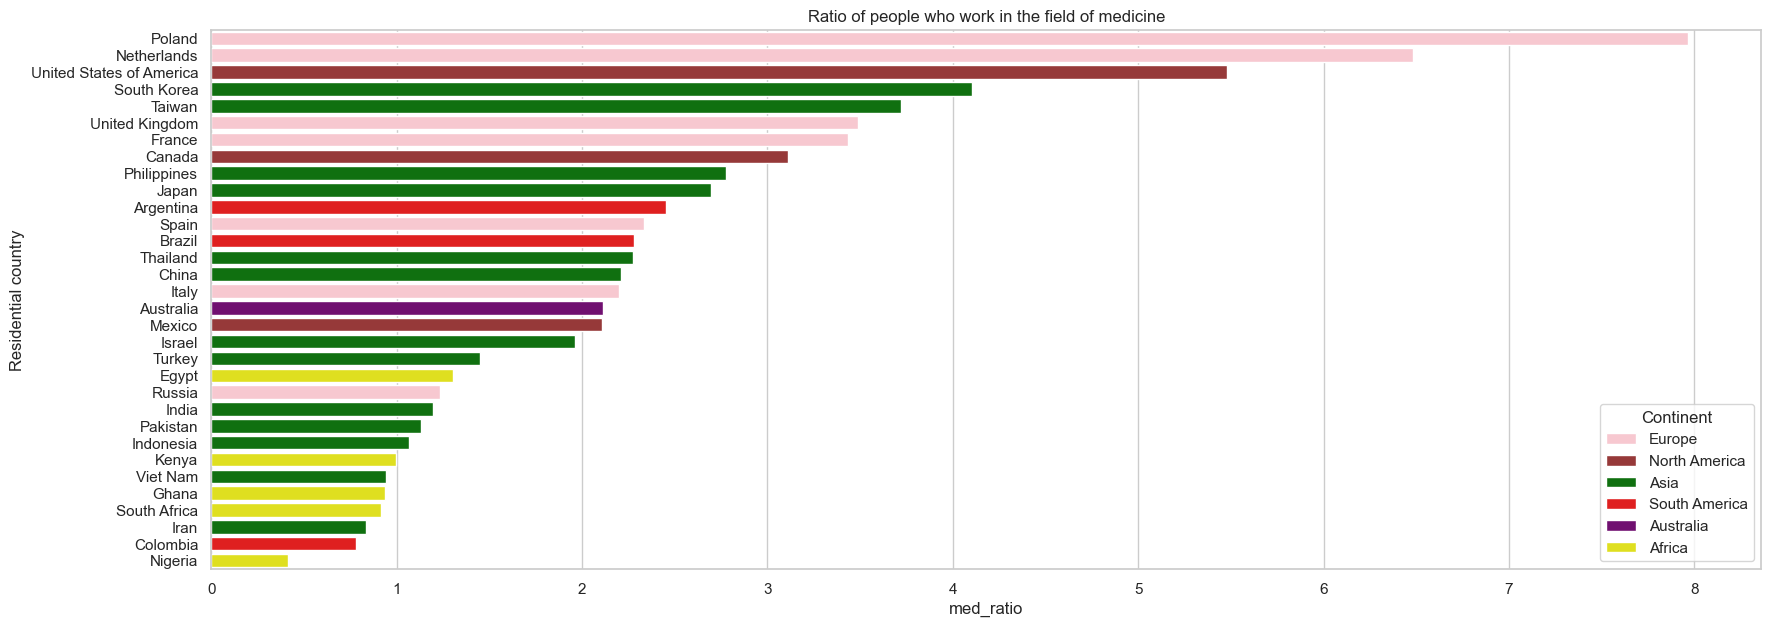

In [24]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='med_ratio', y='Residential country', data=ppl_in_med_industry.sort_values(by='med_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who work in the field of medicine")

The nineth ratio describe the infomation of scale of popularity of the field of medicine in using DS of each countries. The range of the graph is quite limited (~8%). On top of the graph is Poland and the Netherlands, follow by the US, South Korea and Taiwan. The top of the graph is mostly populated with European countries, North American countries and Asian countries.

African and Asian countries populated the bottom of the graph. Vietnam sitting at almost the bottom of the graph (less than 1%).

### Ratio of peole who work in the field of education

In [25]:
ppl_in_ed_industry = data[(data['Current industry'] == 'Academics/Education')]
ppl_in_ed_industry = pd.merge(ppl_in_ed_industry.groupby('Residential country')['Company size'].agg(ed_count = 'count'), total_response_df, on='Residential country')
ppl_in_ed_industry['ed_ratio'] = ppl_in_ed_industry['ed_count'] * 100 / ppl_in_ed_industry['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who work in the field of education')

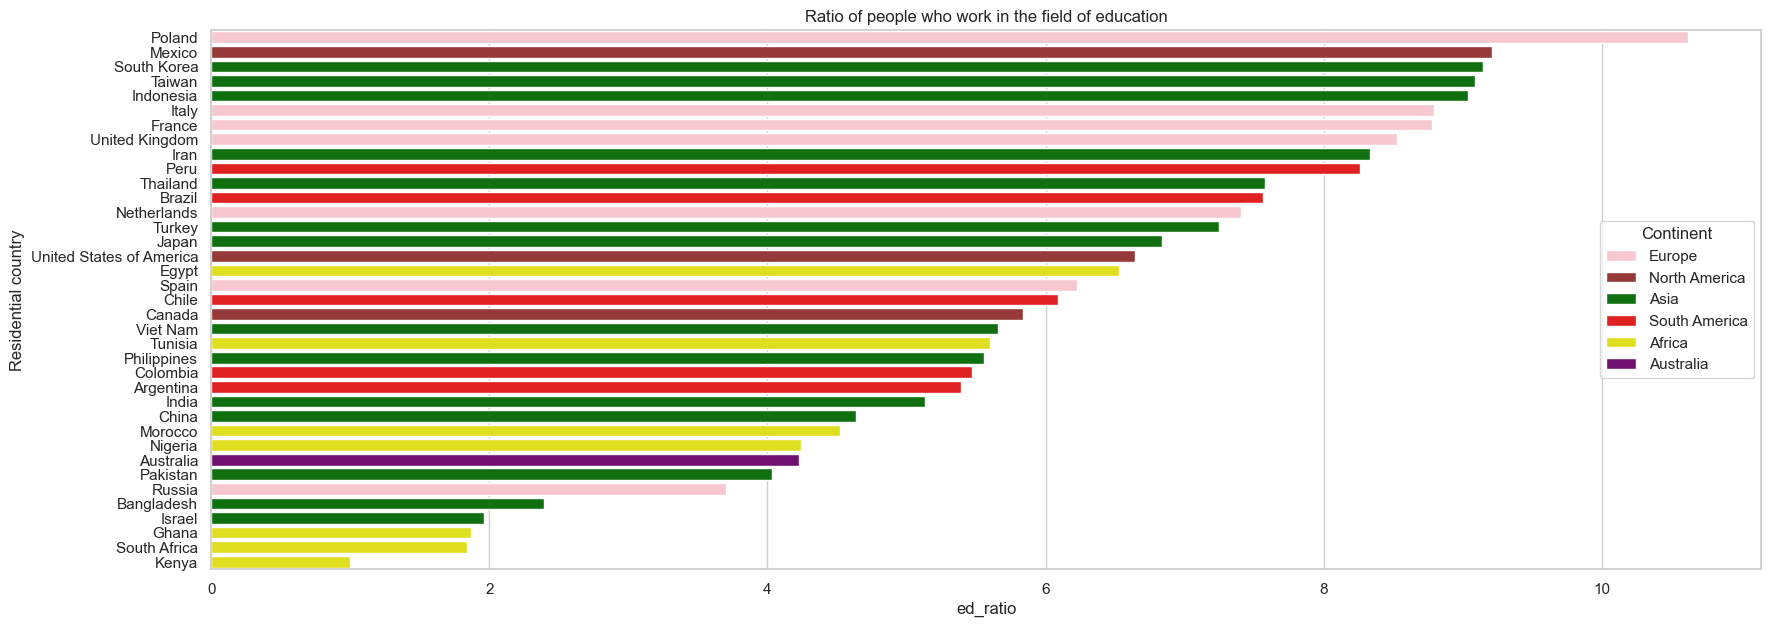

In [26]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ed_ratio', y='Residential country', data=ppl_in_ed_industry.sort_values(by='ed_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who work in the field of education")

The tenth ratio describe the infomation of scale of popularity of the field of education in using DS of each countries. The range of the graph is quite similar to the nineth graph. We see a very different arrangement in this graph compare to the others. The top country is Poland (~10%), but the following countries are unfamiliar, with Mexico at 2nd place (~9% and more than the US) and South Korea (~9%). They are 2 countries in 2 differrent continents. The following countries in rank are Asian and European. 

Overall, the European countries seems to be concentrated at the top half of the graph - with the exeption of Russia at the very bottom (~4%). Australia also rank low (~4%). South America countries are concentrated at the middle of the graph (5% - 8%), while African countries are concentrated at the bottom of the graph, with Kenya being at the very bottom (~1%).

Asian countries are spread out quite evenly from top to bottom, with top being South Korea and bottom is Israel (~2%). Vietnam is ranked at the middle range at ~6%.

### Ratio of peole who make more than 10,000 dollars a year

In [27]:
ppl_make_m10k = data[(data['Current income'] == '> 10,000')]
ppl_make_m10k = pd.merge(ppl_make_m10k.groupby('Residential country')['Company size'].agg(salary10000_count = 'count'), total_response_df, on='Residential country')
ppl_make_m10k['10k_ratio'] = ppl_make_m10k['salary10000_count'] * 100 / ppl_make_m10k['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people who make more than 10,000 dollars a year')

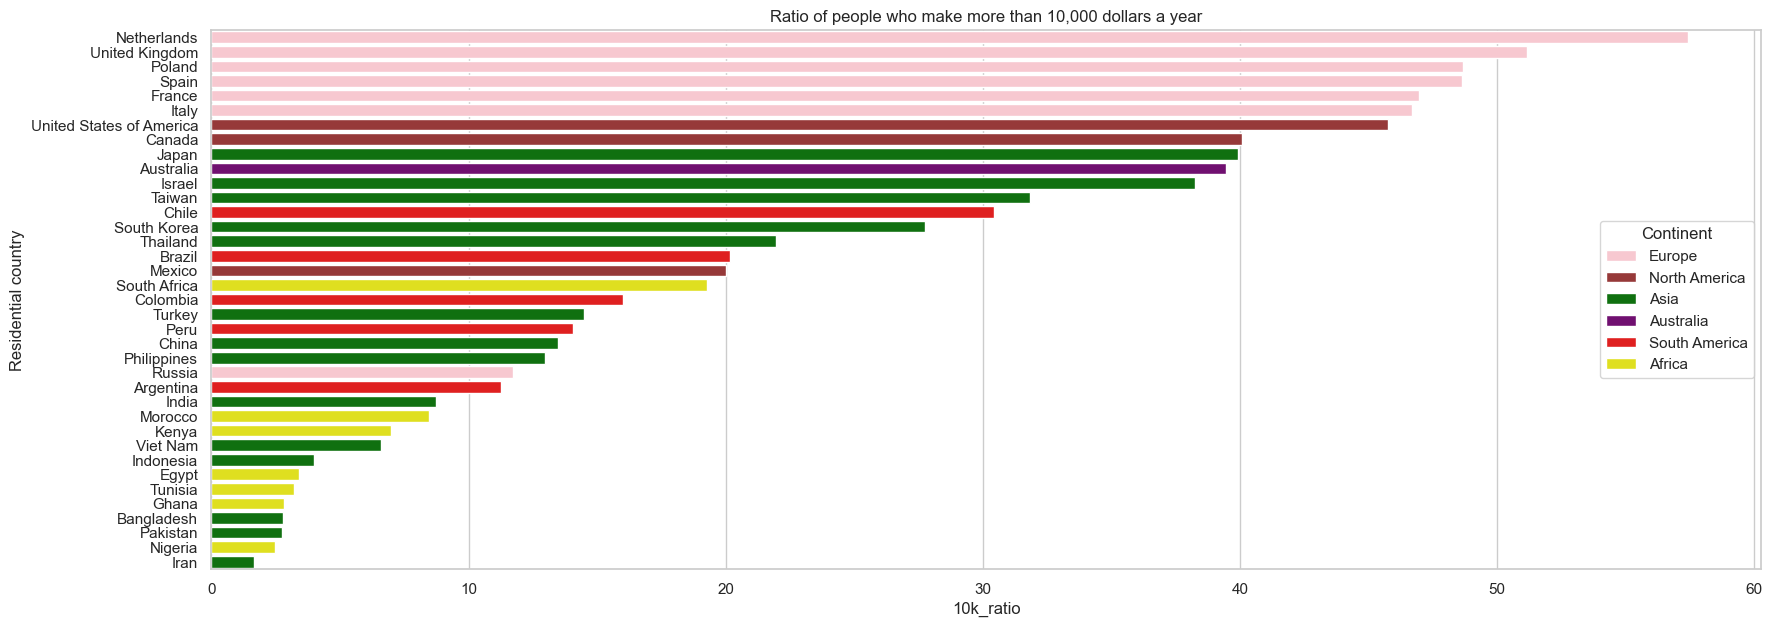

In [28]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='10k_ratio', y='Residential country', data=ppl_make_m10k.sort_values(by='10k_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who make more than 10,000 dollars a year")

The eleventh ratio describe the infomation of people who make more than 10,000 dollars/year (about 833 dollars/month ~ 20 millons vnd/month). As can see that the top 6 countries on top are all European countries - with the top country being the Netherlands (~ 56%). Folliwng by North American countries (US, Canada) and Australia. 

South America countries are concentrated in the middle of the graph (10 - 30%). While Asian countries are distributed from top to bottom, the difference is very large. The top Asian country is Japan with ~40% of people earn more than 10,000$/year, while the bottom country is Iran with only ~2%. Vietnam is ranked close to the bottom of the graph with ~6%.

### Ratio of people who are 20-30 years old who took the survey (junior in their career)

In [29]:
young_people = data[(data['Age'] == '22-24') | (data['Age'] == '25-29')]
young_people = pd.merge(young_people.groupby('Residential country')['Company size'].agg(young_people_count = 'count'), total_response_df, on='Residential country')
young_people['young_ppl_ratio'] = young_people['young_people_count'] * 100 / young_people['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people from 20-30 years old who completed the survey')

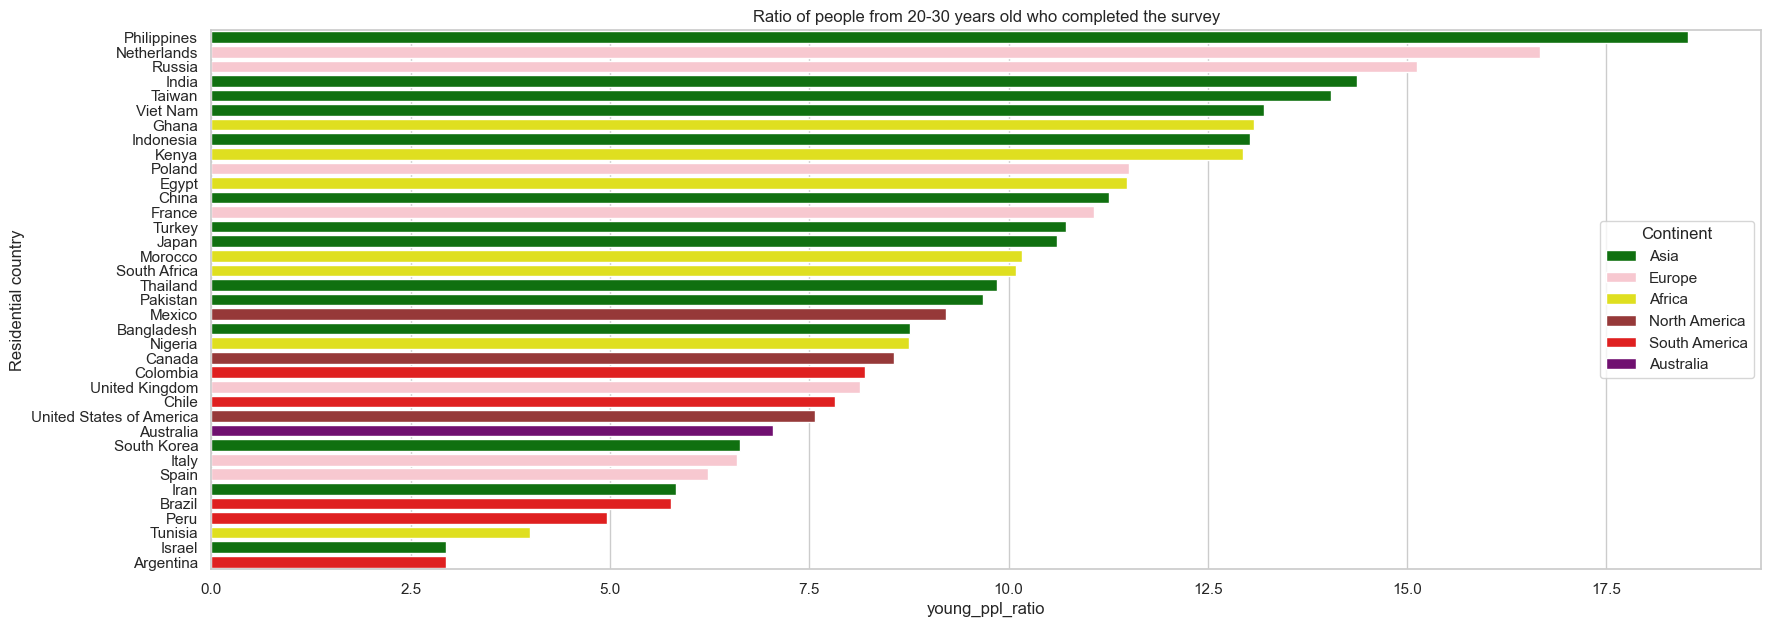

In [30]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='young_ppl_ratio', y='Residential country', data=young_people.sort_values(by='young_ppl_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people from 20-30 years old who completed the survey")

The twelfth ratio describe the infomation of people who are in their 20s in each countries. We are trying to look at the ratio of juniors with less experience and expertise for each countries. The range of the graph isn't very high, with top of ~18%. This time, the top of the graph is more concentrated with Asian and African countries, with the Phillipines at the very top, and while following with the Netherlands and Russia (2 Europe contries), are continuely followed by exclusively Asian and African countries. Overall, we can see that African and Asian countries dominate the top half of the graph.

While other Europe country (like the UK, Italy, Spain) are sintuated at the bottom of the graph, along with North and South American countries. Interestingly, Isreal and Iran are 2 Asian countries that also have very low ratio of people in their 20s. Vietnam is a relatively young country, with more than 12.5% of it's survey taker is in their 20s.

### Ratio of people who are 40-60 years old who took the survey (senior in their career)

In [31]:
older_people = data[(data['Age'] == '40-44') | (data['Age'] == '45-49') | (data['Age'] == '50-54') | (data['Age'] == '55-59')]
older_people = pd.merge(older_people.groupby('Residential country')['Company size'].agg(older_people_count = 'count'), total_response_df, on='Residential country')
older_people['older_ppl_ratio'] = older_people['older_people_count'] * 100 / older_people['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of people from 40-60 years old who completed the survey')

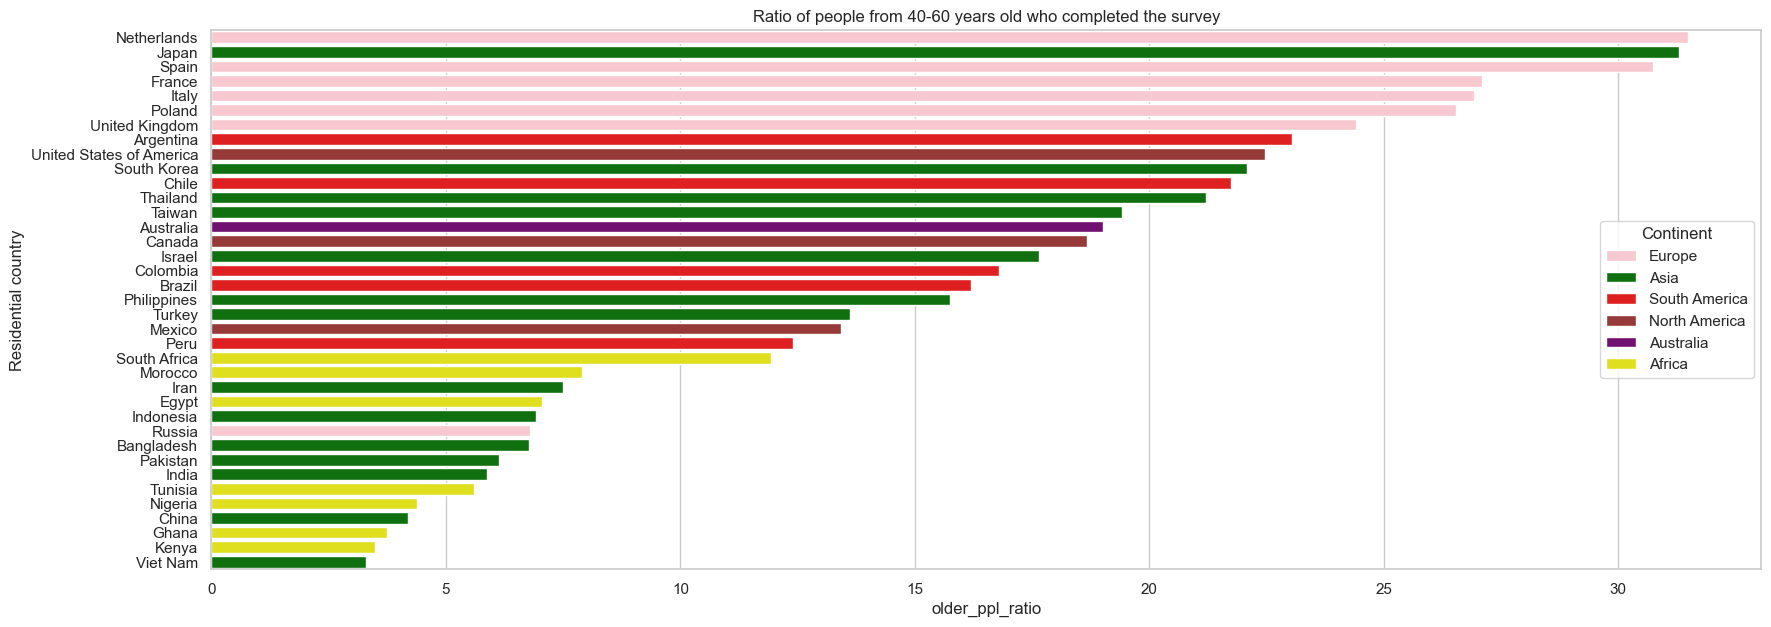

In [32]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='older_ppl_ratio', y='Residential country', data=older_people.sort_values(by='older_ppl_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people from 40-60 years old who completed the survey")

The thirteenth ratio describe the infomation of people who are in middle age (40-60 years old) in each countries. We are looking for the seniors who have more experience and expertise for each countries. The range of the graph (up to 30%) is definately higher than our junior graph. Looking at the graph, we can see that Europe countries (and Japan) have a lot of experts in their hands with assumed more than 10 years experience (~25% - 30%). Which is follow suits by South and Noth America countries at about 20%.

African countries are concentrated at the bottom of the graph (~3% - 10%).

Asian countries (other than Japan) has relatively low experts rate. Developed countries like South Korea, Taiwan, Israel populate the middle of the graph (~15%), while lesser developed countries populate the bottom of the graph along with African country. Interestingly (and maybe quite sadly), Vietnam is at the bottom of the graph with ~3% of total survey taker are in their 40-60 years old. 

### Ratio of male people who completed the survey

In [33]:
male_people = data[(data['Gender'] == 'Man')]
male_people = pd.merge(male_people.groupby('Residential country')['Gender'].agg(male_count = 'count'), total_response_df, on='Residential country')
male_people['man_ratio'] = male_people['male_count'] * 100 / male_people['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Ratio of man who completed the survey')

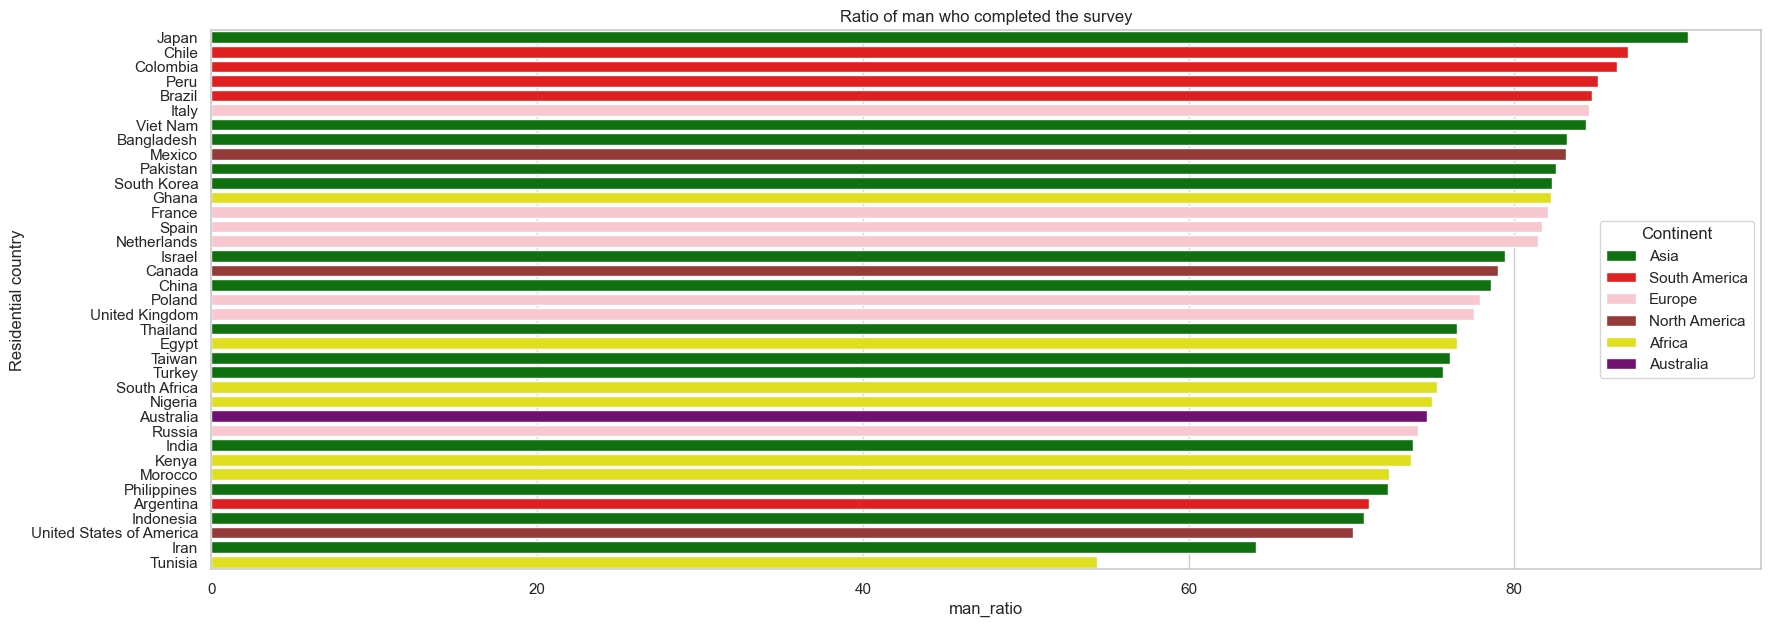

In [34]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='man_ratio', y='Residential country', data=male_people.sort_values(by='man_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of man who completed the survey")

The forteenth ratio describe the infomation of people who are identify as Men while completing the survey. At a glance, we can see that most of the people who are takes the survey are male. The graph are distributed quite chaosticly, with every type of continent. At the top of the graph we have Japan with more ~90 survey taker are male. The countries with lowest male ratio is Tunisia from Africa (~58%), Iran - surprisingly since it's a Islamic country(~62%) and the US (~70%).

Vietnam is ranked quite high with more than 80% survey taker are male.

### Ratio of people who have a master degree

In [35]:
higher_education = data.copy()
higher_education['Higher education?'] = data['Higher education?'].str.replace('Doctoral degree', ">= Master's degree").replace('Professional doctorate', ">= Master's degree").replace("Master's degree", ">= Master's degree")
higher_education = higher_education[(higher_education['Higher education?'] == ">= Master's degree")]
higher_education = pd.merge(higher_education.groupby('Residential country')['Higher education?'].agg(high_ed_count = 'count'), total_response_df, on='Residential country')
higher_education['higher_ed_ratio'] = higher_education['high_ed_count'] * 100 / higher_education['number_of_response']

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, "Ratio of people who has a Master's degree")

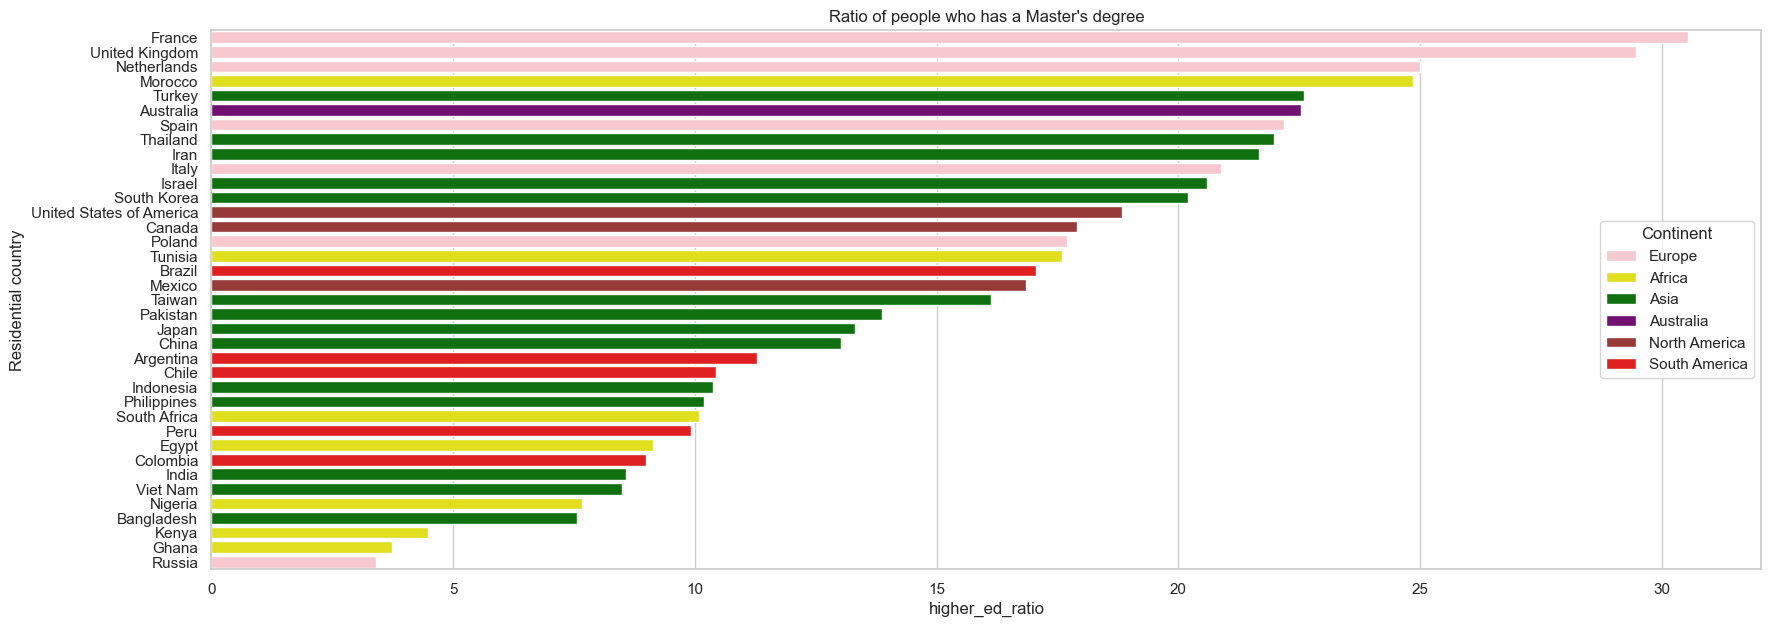

In [36]:
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='higher_ed_ratio', y='Residential country', data=higher_education.sort_values(by='higher_ed_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Ratio of people who has a Master's degree")

The fifteenth ratio describe the infomation of higher education people have in each countries. We are looking for people who have at leat a Master degree, so a Bachelor degree will not be counted. Looking at the graph, we can the that most European countries are very higly educated. The ratio of people who have a Master degree are ranged from 25% - 30%. There is a surprising point is that Morocco (an African country) makes top 5 of the graph. 

South America countries are distributed in the middle-bottom of the graph (10% - 15%), while African countries are concentrated at the bottom of the graph.

Like the trends we have seen in our analysis, North American and Australia are often ranked on the top half of the graph (in this case 19% - 22%). Surprisingly, even though Japan had been on top on many graphs, it's higher education ration isn't very high - at ~14%. Asian countries are more diversly distributed, with countries like Turkey have more than 20% higher educated survey taker, while Bangladesh only have 7%. Vietnam is ranked quite low on the graph, with the ratio of only 8%.

## Answering our questions
1. **What countries/continent is leading in Data Science in the world?**

I will use the ratios we calculated in our analysis to answer this question. To do that, I will use the ranking of the countries in the ratio to create a new metric to determine the strength of the country. The formula I've came up with is quite simple:

$\sum_{x}^n \frac{1}{x}$

With x is the rank of the corresponding countries and n is the number of ratio we are accessing. With this formula, the further away from the top the smaller the score of the country becomes. 

The list of ratio we are accessing:
- `big_com_ratio`: The ratio of peope work in big company in that country
- `com_w20ds_ratio`: The ratio of people work in company with big Data Science team in that country
- `programming_exp_ratio`: The ratio of people who have more than 5 years of programming experience
- `ml_exp_ratio`: The ratio of people who have more than 5 years of ml experience
- `10k_ratio`: The ratio of people who earn more than 10,000 dollars/year
- `higher_ed_ratio`: The ratio of people who have a Master or higher degree

So the maximum score a country can score is 6.

In [37]:
# First, let's collect all of our ratios in one data frame
total_ratio = [big_company_df, small_company_df, company_w20ds_df, company_l5ds_df, ppl_w5y_programming_exp, ppl_w5y_ml_exp, ppl_in_finance_industry, ppl_in_tech_industry, ppl_in_med_industry, ppl_in_ed_industry,ppl_make_m10k, young_people, older_people, higher_education, male_people]
total_ratio_df = reduce(lambda  left,right: pd.merge(left,right,on=['Residential country', 'Continent', 'number_of_response'], how='outer'), total_ratio)

# Get all ratio column
ratio_column_list = pd.Series([col if 'ratio' in col else None for col in total_ratio_df.columns]).dropna()

# Total ratio list
total_ratio_df.set_index(['Residential country', 'Continent'], inplace=True)

In [38]:
# Selected ratio
ds_strength_eval_ratio_list = [
    'big_com_ratio',
    'com_w20ds_ratio',
    'programming_exp_ratio',
    'ml_exp_ratio', 
    '10k_ratio', 
    'higher_ed_ratio'
]

# Get ranking of countries
def country_ranking_index(x):
    res = x.rank(method='dense', ascending=False)
    return res

# Highest score is the number of ratios we're taking into accound
def country_growth_ranking_index(x):
    res = np.sum(1/x)
    return res

country_growth_ranking_df = total_ratio_df.loc[:, ratio_column_list].apply(country_ranking_index, axis=0)
country_growth_ranking_df['ds_strength_ratio'] = country_growth_ranking_df.loc[:, ds_strength_eval_ratio_list].apply(country_growth_ranking_index, axis=1)
country_growth_ranking_df.reset_index(inplace=True)

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Strength of countries calculated by rank of countries in 15 ratios')

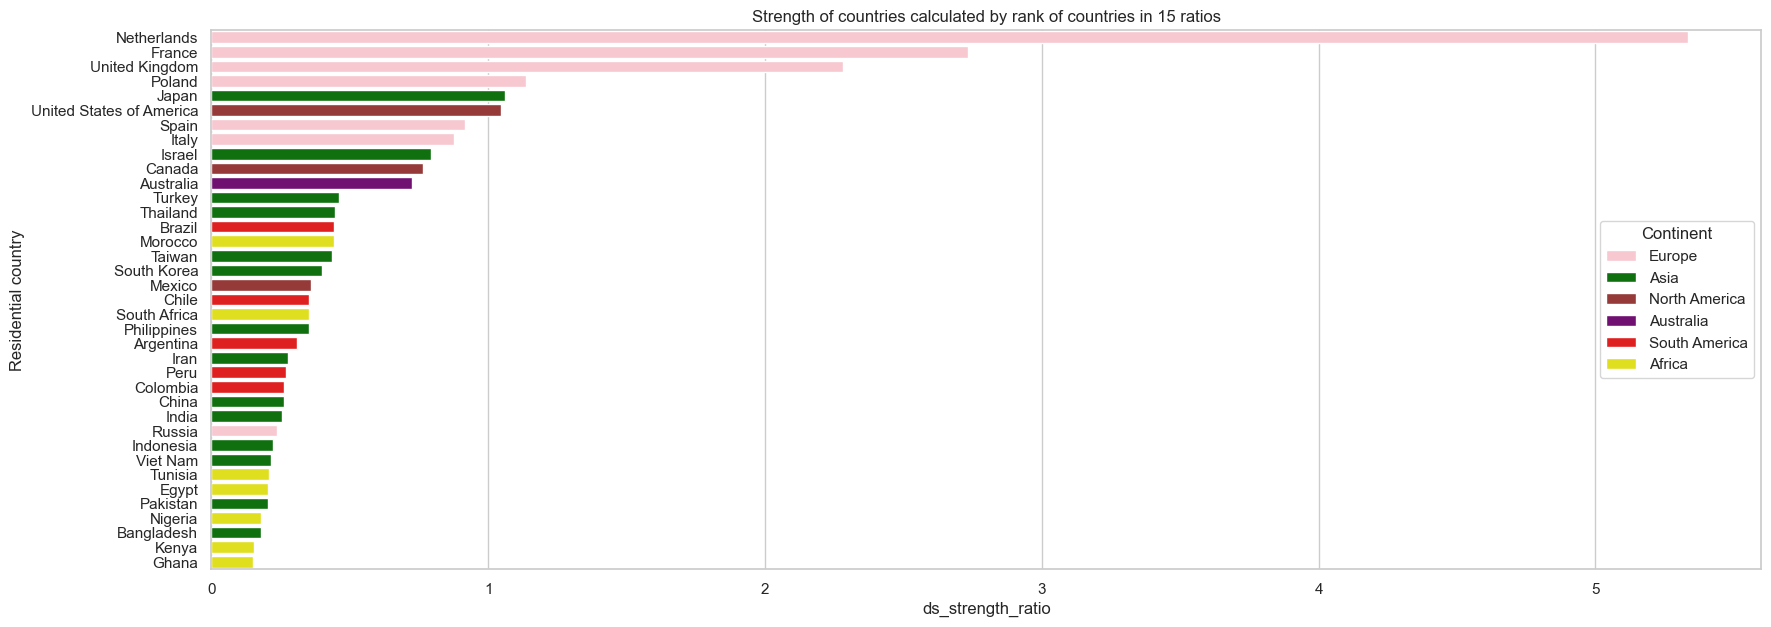

In [39]:
# Reset index to use index for visualization
country_growth_ranking_df.reset_index(inplace=True)

# Draw figure
figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x='ds_strength_ratio', y='Residential country', data=country_growth_ranking_df.sort_values(by='ds_strength_ratio', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Strength of countries calculated by rank of countries in 15 ratios")

Looking at the graph, we can easily determine that the Netherlands is the country leading in Data Science and related fileds, with score of over 5 - meaning it tops at least 5 accounted ratio. Follwing behind are French, the UK, Poland and Japan (an Asian country) and the US.

We notice there is a clear separation between the developed and developing countries as the developed countries almost all sit on the top and developing countries at the bottom. Curiously, China is sitting at the bottom tile, which is quite contradictory to its current international superpower position. The same goes for Russia, which has consistently score quite low in almost all ratio.

While South American countries are consistenly score middle of the graph, it seems like African and Asian countries both have a long way to go to achive a better Data Science (and more broadly Data based decision making) foothold. 

Vietnam is ranked 8th from the bottom, and 3rd from the bottom if we're counting only Asian countries. Though it is acknowledged that Vietnam had made it to be accounted as a country with a big enough response pool to be included in analysis (which is to say there is a pool DS sprofessionals and related prefessions), there is a lot we can and must do to improve. Base on our analysis, one of that metric to use could be our experience with programming and machine learning technologies, as well as highten our education level.


2. **What field to expect most growth in each continent**

For this analysis, I choose 4 fields to focus in: Finance, Technology, Medicine and Education. You might notice another field that is popular with Data Science is Marketing. The reason I choose to focus on these 4 fields is because of my own interest. 

With that out of the way, let's draw some visualization. We're focusing on continet and not countries, so the number of rows we're dealing with has reduced to only 4. There are 4 fields that we neend visualize. Let's draw a heat map to see how the interest in each field is distributed by continent.

[Text(0.5, 1.0, 'Distribution of ratio of people who completed survey industry by continent')]

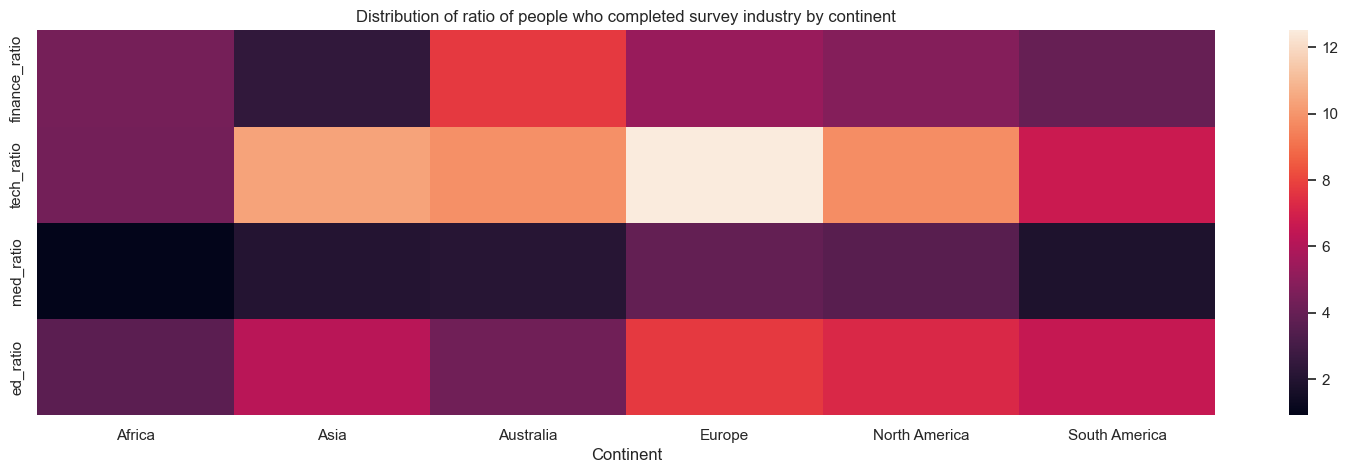

In [129]:
# Industry ratio
industry_eval_ratio_list = [
    'finance_ratio',
    'tech_ratio',
    'med_ratio',
    'ed_ratio'
]

# Industry data frame
industry_growth_ratio = total_ratio_df.loc[:, industry_eval_ratio_list]

# world.set_index('name', inplace=True)
fig, ax = plt.subplots(figsize=(19, 5))
industry_growth_ratio = industry_growth_ratio.groupby(['Continent']).agg('mean')

# Draw heat map
sns.heatmap(industry_growth_ratio.T, fmt=".1f").set(title='Distribution of ratio of people who completed survey industry by continent')

Looking at the graph, we can easity see that among the 4 fields, Medicine is the most unpopular in every continent. Technology seems to be the most popular field with almost all continet. Education and Finance seems to be the same level of growth, with finance seems to be more popular in Australia, and Education is more focused in Europe and Asia. 

Continent wise, Africa is clearly the most under-developed. Europe, North America and Australia are leading in almost every field, and Asia a bit behind though very developed in Technology. South America seems to be doing okay, though no field seems to be especially popular.

3. **What is the future Data Scientists and related demographic look like?**

This time, let's use the ratio we've gathered about demographic to answer our questions. We are looking for the demographic of young people who participated in the survey - people from 20-30 years old to see what they look like, and from that make prediction abou the people that will be leading in Data Science in the future. For this question, we are looking at 3 smaller questions: 

- How are the young people in each country contributing to the total people who are in the Data Science field in each continent?
- What are the gender distribution of young people each continent?

This time, becuase the data is a bit simple, so let's go back to our main dataframe and use some additional data to make it more interesting.

First, let's try to answer our first sub-question.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(0.5, 1.0, 'Mean of young people (20 - 30 years old) ratio by continent')

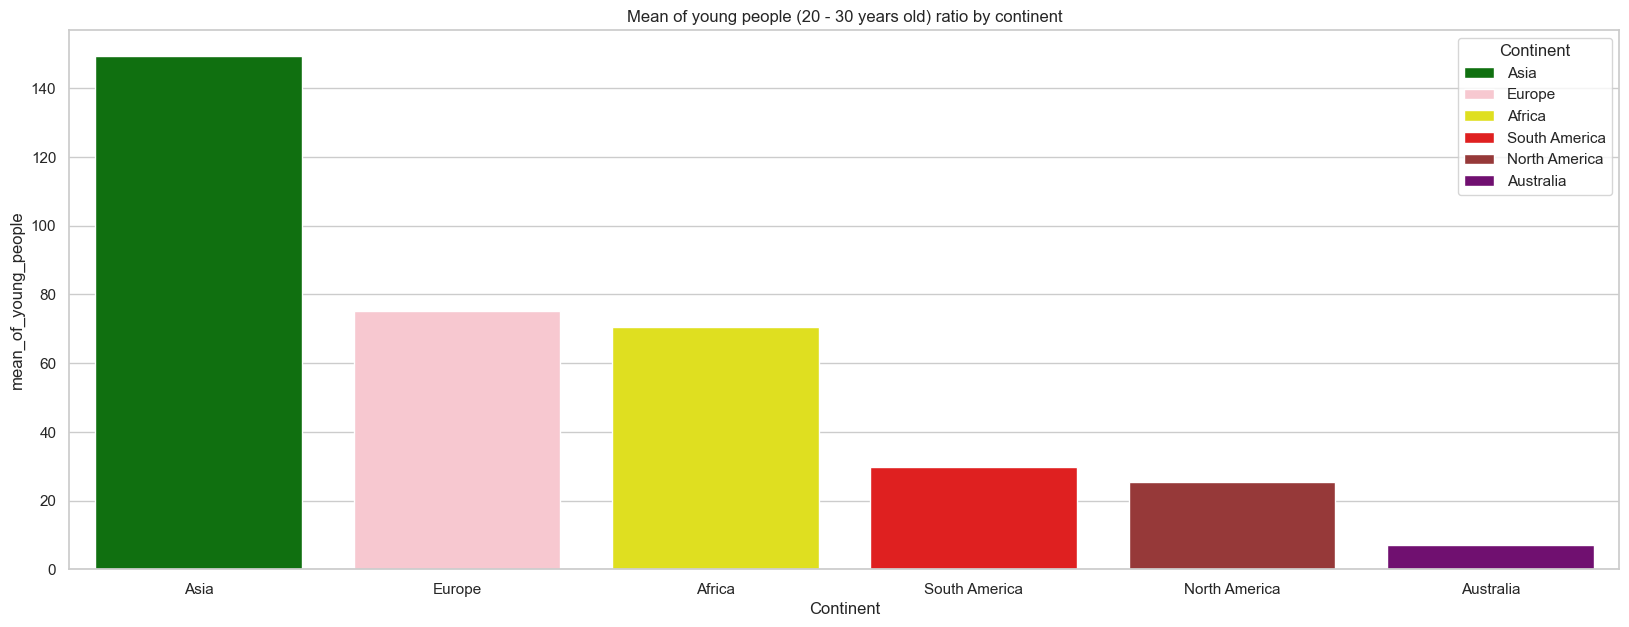

In [132]:
young_people_continent_ratio = young_people.groupby('Continent')['young_ppl_ratio'].agg(mean_of_young_people='sum')
young_people_continent_ratio.reset_index(inplace= True)

figure, ax = plt.subplots(figsize=(20, 7))
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(y='mean_of_young_people', x='Continent', data=young_people_continent_ratio.sort_values(by='mean_of_young_people', ascending=False),palette = continent_color ,hue='Continent', dodge=False)
ax.set_title("Mean of young people (20 - 30 years old) ratio by continent")

Looking at the graph, clear that there are a lot of young people from Asia. While scoring 2nd and 3rd place, Europe and Africa only accounted about half of Asia. There are less participation in South America, North America and the lowet are Australia.

Let's look at the distribution of gender of young people in the continents now.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

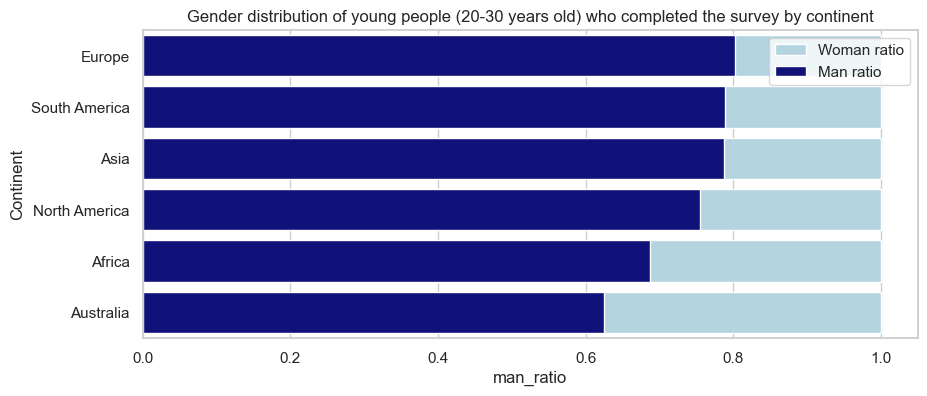

In [131]:
young_people_and_gender_distribution = data[((data['Age'] == '22-24') | (data['Age'] == '25-29'))]
young_people_and_gender_ratio = young_people_and_gender_distribution[young_people_and_gender_distribution['Gender'] == 'Man'].groupby(['Residential country'])['Gender'].agg(man_count = 'count')
young_people_and_gender_ratio['woman_count'] = young_people_and_gender_distribution[young_people_and_gender_distribution['Gender'] == 'Woman'].groupby(['Residential country'])['Gender'].agg(man_count = 'count')
young_people_and_gender_ratio['total'] = young_people_and_gender_ratio['man_count'] + young_people_and_gender_ratio['woman_count']

young_people_and_gender_ratio['man_ratio'] = young_people_and_gender_ratio['man_count'] / young_people_and_gender_ratio['total']
young_people_and_gender_ratio['woman_ratio'] = young_people_and_gender_ratio['total'] / young_people_and_gender_ratio['total']

young_people_and_gender_ratio = pd.merge(young_people_and_gender_ratio, total_response_df, on='Residential country')
young_people_and_gender_ratio_continent = young_people_and_gender_ratio.groupby('Continent')['man_ratio'].agg(man_ratio = 'mean')
young_people_and_gender_ratio_continent['woman_ratio'] = 1

plt.figure(figsize=(10,4))
young_people_and_gender_ratio_continent.reset_index(inplace=True)
bar2 = sns.barplot(x='woman_ratio', y='Continent', data=young_people_and_gender_ratio_continent, color='lightblue', label='Woman ratio')
bar1 = sns.barplot(x='man_ratio', y='Continent', data=young_people_and_gender_ratio_continent.sort_values(by='man_ratio', ascending=False), color='darkblue', label = 'Man ratio')
plt.title('Gender distribution of young people (20-30 years old) who completed the survey by continent')
plt.legend()
plt.show()

We see that in all continent, there are more man than woman in the field. The highest is Europe - at 80% man over 20% woman, and lowest are Australia at about 60% man over 40% woman.

we can see that the future of this field is going to be male-dominated all over the world.

### Summary

Let's go back to our original question and wrap up our insights. 
The first questions we pose is:

**What is the state of Data Science in the world today?**

Which is a very broad and hard to navigate questions. We then divide our interest and intend of asking this question into 3 smaller question: 

1. What country/continent is leading in Data Science in the world?
2. What field to expect most growth in each continent?
3. What is the future Data Scientists and related demograph look like?

As we try to find an answer to these questions, we calculated and uses ratios for each countries to encover insights. From that, there are many interesting discovery we've made, and in the end, we have come to some conclusions and answer to our questions.

For question 1:
- The Netherlands is the leading country in Data Science (and related fields) in the world.
- Japan is the most developed in Asia when it comes to Data Science (and related fields).
- European, North America countries and Australia is leading the world in DS (and related fields).
- African and Asian countries have a long way to go gain better foothold.
- Vietnam is ranked almost bottom of the world and have a lot to do to grow.

For question 2:
- Medicine is the most unpolular field in the 4 fields we've looked at in all continent.
- Technology is the most popular field in the 4 fields we've looked at in all continent.
- European and North American countries are leading in almost all fields.

For question 3:
- There are a lot of young people joining the Data Science field. Most of them comes from Asia.
- There are more man join the Data Science field than woman in every continent, with the ratio from 65% - 80% depends on continent. 
- Data Science is going to be a male-dominated field in the future.